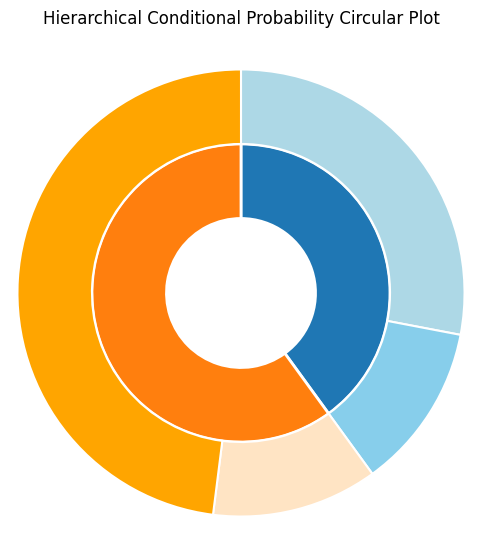

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example: hierarchical probabilities
# Level 1 (unconditional)
P_A = np.array([0.4, 0.6])  # e.g., P(A1), P(A2)
# Level 2 (conditional on A)
P_B_given_A = [
    np.array([0.7, 0.3]),   # P(B|A1)
    np.array([0.2, 0.8])    # P(B|A2)
]

# Define colors (you can make these prettier later)
colors_level1 = ['tab:blue', 'tab:orange']
colors_level2 = [['lightblue', 'skyblue'], ['bisque', 'orange']]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_axis_off()

# ----- Inner Ring (Level 1) -----
start_angle = 0
r_inner, r_outer = 0.3, 0.6
for i, p in enumerate(P_A):
    theta1 = start_angle
    theta2 = start_angle + 2 * np.pi * p
    ax.bar(
        x=(theta1 + theta2) / 2,
        height=r_outer - r_inner,
        width=2 * np.pi * p,
        bottom=r_inner,
        color=colors_level1[i],
        edgecolor='white',
        linewidth=2
    )
    start_angle = theta2

# ----- Outer Ring (Level 2) -----
r_inner, r_outer = 0.6, 0.9
start_angle = 0
for i, p_a in enumerate(P_A):
    for j, p_b in enumerate(P_B_given_A[i]):
        theta1 = start_angle
        theta2 = start_angle + 2 * np.pi * p_a * p_b
        ax.bar(
            x=(theta1 + theta2) / 2,
            height=r_outer - r_inner,
            width=2 * np.pi * p_a * p_b,
            bottom=r_inner,
            color=colors_level2[i][j],
            edgecolor='white',
            linewidth=1.5
        )
        start_angle = theta2

plt.title("Hierarchical Conditional Probability Circular Plot", va='bottom')
plt.show()


In [2]:
import plotly.express as px
import pandas as pd

data = pd.DataFrame({
    "A": ["A1", "A1", "A2", "A2"],
    "B": ["B1", "B2", "B1", "B2"],
    "prob": [0.4*0.7, 0.4*0.3, 0.6*0.2, 0.6*0.8]
})

fig = px.sunburst(data, path=["A", "B"], values="prob",
                  color="A", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()
